#                ***Introduction to Reinforcement Learning for Trading Zoom's Stock***

In this project, I trained a reinforcement learning (RL) agent to trade Zoom's stock using the OpenAI AnyTrading gym environment. The agent was trained on data from 2019 to 2020, which was obtained from MarketWatch.I used Stable Baselines 3 and TensorFlow to train the agent.

RL is a type of machine learning technique in which an agent learns to behave in an environment in order to maximize a reward signal. In this case, the environment is the Zoom stock market and the reward signal is the agent's profit.

The agent was trained using the A2C algorithm, which is a policy-based RL algorithm. This means that the agent learns to directly predict the actions that it should take in each state.

Once the agent was trained, i tested its performance on a simulated trading environment. The agent was able to achieve a positive profit, which shows that it was able to learn a profitable trading strategy.

This project is a demonstration of the potential of RL to be used for stock trading. RL agents can be trained to learn complex trading strategies that can be profitable in the long term.

In [ ]:
#Specfic tensorflow version required to work with stable_baselines3
!pip install tensorflow==1.15.0 
import gym
import gym_anytrading
import stable_baselines3
#A2C is the algorithm used by the agent
from stable_baselines3 import A2C

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
df=pd.read_csv("ZoomData.csv")

In [7]:
df.head()


,Date,Open,High,Low,Close,Volume
0,10/16/2020,544.00,565.45,543.25,559.00,"13,745,750"
1,10/15/2020,509.08,540.05,506.50,536.40,"16,520,600"
2,10/14/2020,518.78,519.80,498.60,509.25,"8,327,654"
3,10/13/2020,494.00,520.00,493.00,518.79,"8,941,474"
4,10/12/2020,501.43,506.11,490.48,491.54,"6,979,462"


In [8]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume     object
dtype: object

In [8]:
#Date type must be changed in order to be passed into anytrading environment
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume            object
dtype: object

In [9]:
#Index required for gym any trading environment
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
10/16/2020,544.00,565.45,543.25,559.00,"13,745,750"
10/15/2020,509.08,540.05,506.50,536.40,"16,520,600"
10/14/2020,518.78,519.80,498.60,509.25,"8,327,654"
10/13/2020,494.00,520.00,493.00,518.79,"8,941,474"
10/12/2020,501.43,506.11,490.48,491.54,"6,979,462"


# The code below creates a new Gym environment for trading stocks.

**Parameters:**

* `stocks-v0`: The name of the Gym environment for trading stocks.
* `df`: The DataFrame containing the stock data.
* `frame_bound=(5,100)`: A tuple that specifies the start and end of the DataFrame to use for the environment. The start is 5 days before the current date, and the end is 100 days after the current date.
* `window_size=5`: The number of previous days to use as the state for the environment.

**Explanation:**

The `stocks-v0` environment is a Gym environment for trading stocks. The environment simulates the real stock market and allows agents to trade stocks using different strategies.

The `df` DataFrame is used to provide the environment with the data that it needs to simulate the stock market. The DataFrame should contain the following columns:

* `Date`: The date of the stock trade.
* `Open`: The opening price of the stock on the trade date.
* `High`: The highest price of the stock on the trade date.
* `Low`: The lowest price of the stock on the trade date.
* `Close`: The closing price of the stock on the trade date.
* `Volume`: The volume of trades made on the trade date.

The `frame_bound` parameter specifies the start and end of the DataFrame to use for the environment. The start is 5 days before the current date, and the end is 100 days after the current date. This means that the environment will use the last 5 days of stock prices to generate the current state.

The `window_size` parameter specifies the number of previous days to use as the state for the environment. In this case, the `window_size` is set to 5, which means that the environment will use the last 5 days of stock prices to generate the current state.


In [37]:
def create_stock_env(df,first_step,last_step):
    return gym.make('stocks-v0', df=df, frame_bound=(first_step, last_step), window_size=first_step)

env=create_stock_env(df.sort_index(),5,100)

# Testing Environment before Training
This code works by first resetting the environment and getting the initial state. Then, it starts a loop to interact with the environment. On each iteration of the loop, the code samples an action (buy or sell) from the action space. It then takes a step in the environment and gets the next state, reward, done flag, and info dictionary.

If the done flag is True, the episode is finished and the loop breaks. Otherwise, the loop continues.

The code prints the info dictionary at the end of each episode. The info dictionary contains additional information about the environment and the episode, such as the total reward earned and the profit made.

The code also renders the environment and shows the plot at the end of the episode. The plot shows the stock prices and the agent's positions over time. The red dots on the plot indicate short positions and the green dots indicate buy positions.

This code can be used to test the trained model by seeing how well it performs in the simulated stock trading environment. The code can also be used to evaluate different hyperparameters for the model.



info {'total_reward': 59.090000000000046, 'total_profit': 1.1074372411562803, 'position': 0}


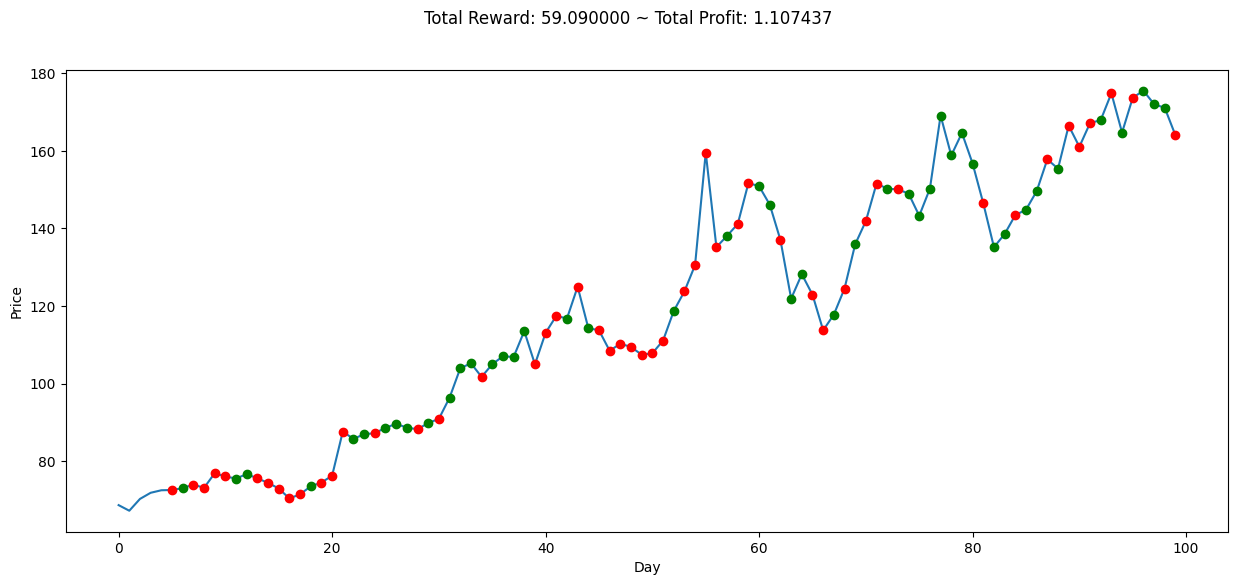

In [47]:
# Reset the environment and get the initial state.
state = env.reset()

# Start a loop to interact with the environment.
while True:

    # Sample an action (buy or sell) from the action space.
    action = env.action_space.sample()

    # Take a step in the environment and get the next state, reward, done flag, and info dictionary.
    n_state, reward, done, info = env.step(action)

    # If the done flag is True, the episode is finished.
    if done:
        # Print the info dictionary.
        print("info", info)

        # Break out of the loop.
        break

# Render the environment and show the plot.
plt.figure(figsize=(15, 6))
plt.cla()
env.render_all()
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()


In [39]:
#New environment is created to train model
env_2=create_stock_env(df.sort_index(),5,100)

# RL policy Used
**Actor-Critic (A2C)** is a policy-based RL algorithm that is well-suited for stock trading. A2C learns to directly predict the actions that the agent should take in each state. This is in contrast to value-based RL algorithms, which learn to predict the value of each state.

The **MLP policy network** is a simple and flexible neural network architecture that is also well-suited for stock trading. The MLP policy network can be easily adapted to different stock markets and trading strategies.

**Explained variance** is a measure of how well the agent's policy network can predict the agent's returns. A high explained variance indicates that the agent's policy network is able to accurately capture the relationship between the agent's actions and its returns. This is important for stock trading because it allows the agent to learn strategies that lead to higher expected returns.

**Why A2C MLP policy is good for stock trading:**

* A2C is a policy-based reinforcement learning algorithm, which means that it learns to directly predict the actions that the agent should take in each state. This is a good fit for stock trading because it allows the agent to learn complex strategies, such as buying and selling stocks at different times and prices, based on the current market conditions.
* The MLP policy network is a simple and flexible neural network architecture. This makes it a good fit for stock trading because it can be easily adapted to different stock markets and trading strategies.

**Why the explained variance should be close to 1:**

The explained variance is a measure of how well the agent's policy network can predict the agent's returns. A high explained variance indicates that the agent's policy network is able to accurately capture the relationship between the agent's actions and its returns. This is important for stock trading because it allows the agent to learn strategies that lead to higher expected returns.

**Example:**

```python
# Train an A2C agent with an MLP policy network to interact with the `env_2` environment.
# The agent's training progress will be logged verbosely.
model = A2C('MlpPolicy', env_2, verbose=1)

# Train the agent for 100,000 timesteps.
model.learn(total_timesteps=100000)


This code will train an A2C agent with an MLP policy network to interact with the `env_2` environment for 100,000 timesteps. The agent's training progress will be logged verbosely.

Once the agent is trained, it can be used to trade stocks in the real world by interacting with a real-world stock trading environment.


In [40]:
model = A2C('MlpPolicy', env_2, verbose=1)

model.learn(total_timesteps=100000)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 94       |
|    ep_rew_mean        | 26.8     |
| time/                 |          |
|    fps                | 976      |
|    iterations         | 100      |
|    time_elapsed       | 0        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -0.639   |
|    explained_variance | -0.0138  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | 0.907    |
|    value_loss         | 4.46     |
------------------------------------
------------------------------------
| rollout/              |          |
|    ep_len_mean        | 94       |
|    ep_rew_mean        | 24.8     |
| time/                 |          |
|    fps                | 974      |
|    iterations         | 200      |
|    time_elapsed 

KeyboardInterrupt: 

In [41]:
#A new Gym environment is created to test the trained model.
env_3=create_stock_env(df.sort_index(),5,100)

# Get the initial state of the environment.
obs = env_3.reset()

# Start a loop to interact with the environment.
while True:

    # Add a new axis to the observation, so that it has the same shape as the input to the model.
    obs = obs[np.newaxis, ...]

    # Get the action that the model recommends, given the current observation.
    action, _states = model.predict(obs)

    # Take the action in the environment and get the next state, reward, done flag, and info dictionary.
    obs, rewards, done, info = env_3.step(action)

    # If the done flag is True, the episode is finished.
    if done:
        # Print the info dictionary.
        print("info", info)

        # Break out of the loop.
        break


info {'total_reward': 46.59, 'total_profit': 1.1071061245699731, 'position': 0}


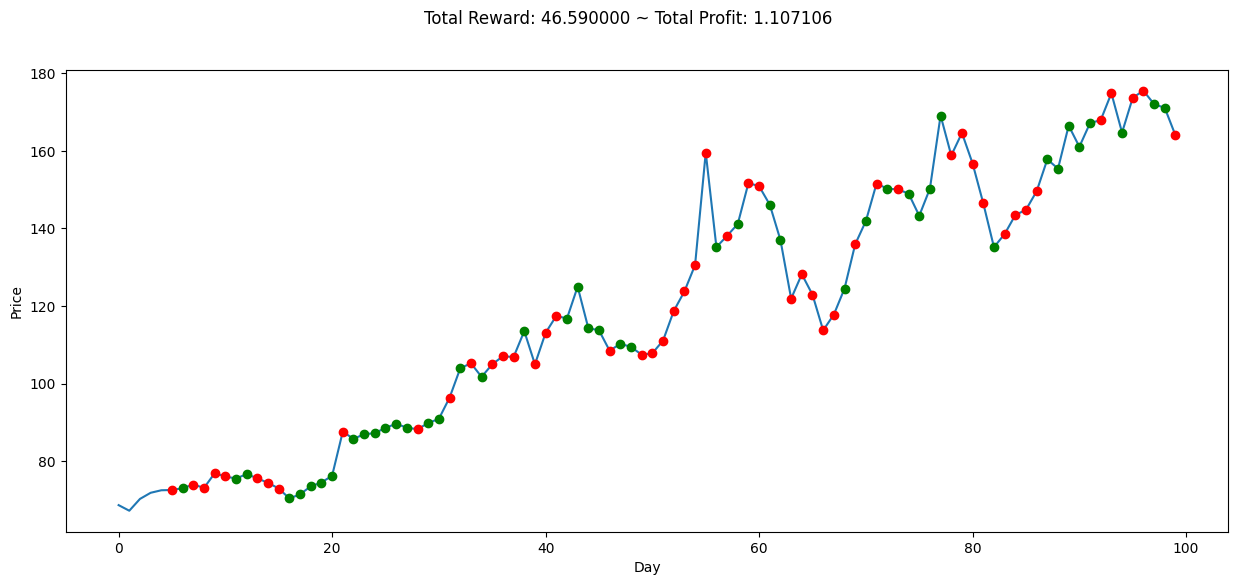

In [46]:
plt.figure(figsize=(15,6))
plt.cla()
env_3.render_all()
plt.xlabel("Day")
plt.ylabel("Price")
plt.show()